## Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html= browser.html
soup = BeautifulSoup(html,'html.parser')

In [5]:
# Extract the table from the HTML
table = soup.find('table', class_='table')

In [6]:
# Extract all rows of data
rows = table.find_all('tr')

# Print the rows to check the content
for row in rows[:3]:
    print(row)
    print("--------------------------")

<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
--------------------------
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
--------------------------
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
--------------------------


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Extract the header row
header_row = table.find('tr')
headers = [header.get_text() for header in header_row.find_all('th')]

# Print the headers to check the content
print(headers)

# Extract all rows of data
rows = table.find_all('tr')[1:]  # Skip the header row

# Create an empty list to store the rows
rows_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = [cell.get_text() for cell in row.find_all('td')]
    rows_data.append(row_data)

# Print the rows_data to check the content
for row in rows_data[:5]:
    print(row)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']


In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows_data, columns=headers)

In [9]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
# Find the unique values in the 'month' column
mars_months = df['month'].unique()

# Print the number of unique months
print(f"There are {len(mars_months)} months on Mars.")

There are 12 months on Mars.


In [14]:
# 2. How many sols (Martian days) worth of data are there?
# Find the number of unique sols in the 'sol' column
num_sols = df['sol'].nunique()

# Print the number of sols
print(f"There are {num_sols} sols worth of data.")

There are 1867 sols worth of data.


In [15]:
# 3. What is the average minimum temperature by month?
# Calculate the average minimum temperature by month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


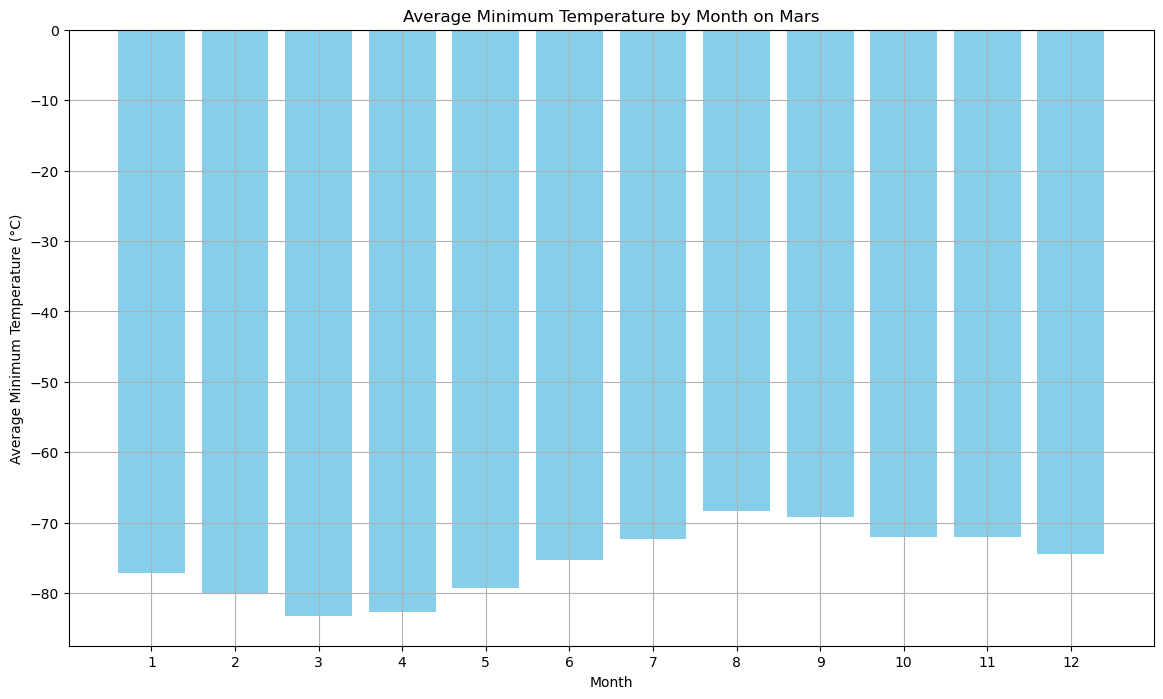

In [16]:
# Plot the average minimum temperature by month

plt.figure(figsize=(14,8))
plt.bar(avg_min_temp_by_month.index, avg_min_temp_by_month.values, color='skyblue')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.grid(True)
plt.xticks(ticks=avg_min_temp_by_month.index, labels=avg_min_temp_by_month.index)
plt.show()

3rd month is the coldest month on mars with a temperature of -83.30729166666667°C
8th month is the hottest month on mars with a temperature of -68.38297872340425°C
On an average Mars has -76.12104981253347 °C temperature


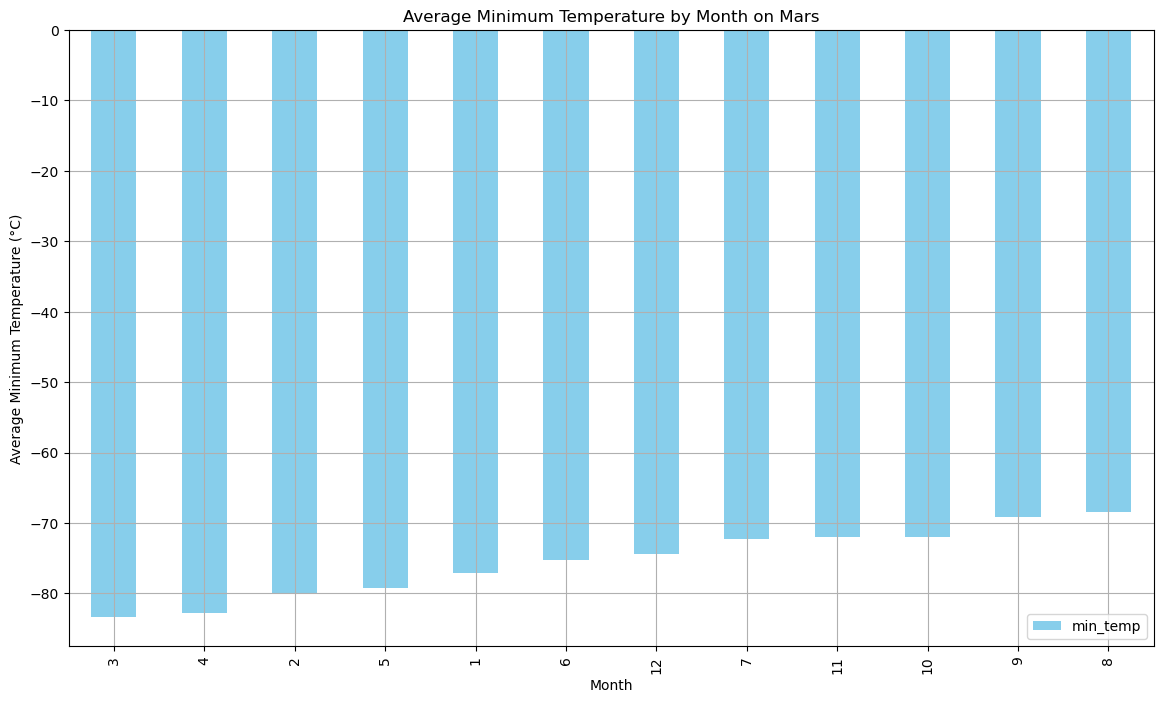

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the average minimum temperature by month and convert to DataFrame
avg_min_temp_by_month_sorted = pd.DataFrame(avg_min_temp_by_month.sort_values())
avg_temp_mars = df['min_temp'].sum()/df['min_temp'].__len__()

# Get the coldest and hottest months along with their index values
coldest_month_value = avg_min_temp_by_month_sorted.iloc[0]['min_temp']
coldest_month_index = avg_min_temp_by_month_sorted.index[0]
hottest_month_value = avg_min_temp_by_month_sorted.iloc[-1]['min_temp']
hottest_month_index = avg_min_temp_by_month_sorted.index[-1]

print(f"{coldest_month_index}rd month is the coldest month on mars with a temperature of {coldest_month_value}°C")
print(f"{hottest_month_index}th month is the hottest month on mars with a temperature of {hottest_month_value}°C")
print(f'On an average Mars has {avg_temp_mars} °C temperature')

# Plot the sorted average minimum temperature by month as a bar graph with x-axis on the top
avg_min_temp_by_month_sorted.plot(kind='bar', y='min_temp', color='skyblue', figsize=(14,8))
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.grid(True)
plt.show()

In [18]:
# 4. What is the average pressure by month?
# Calculate the average pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


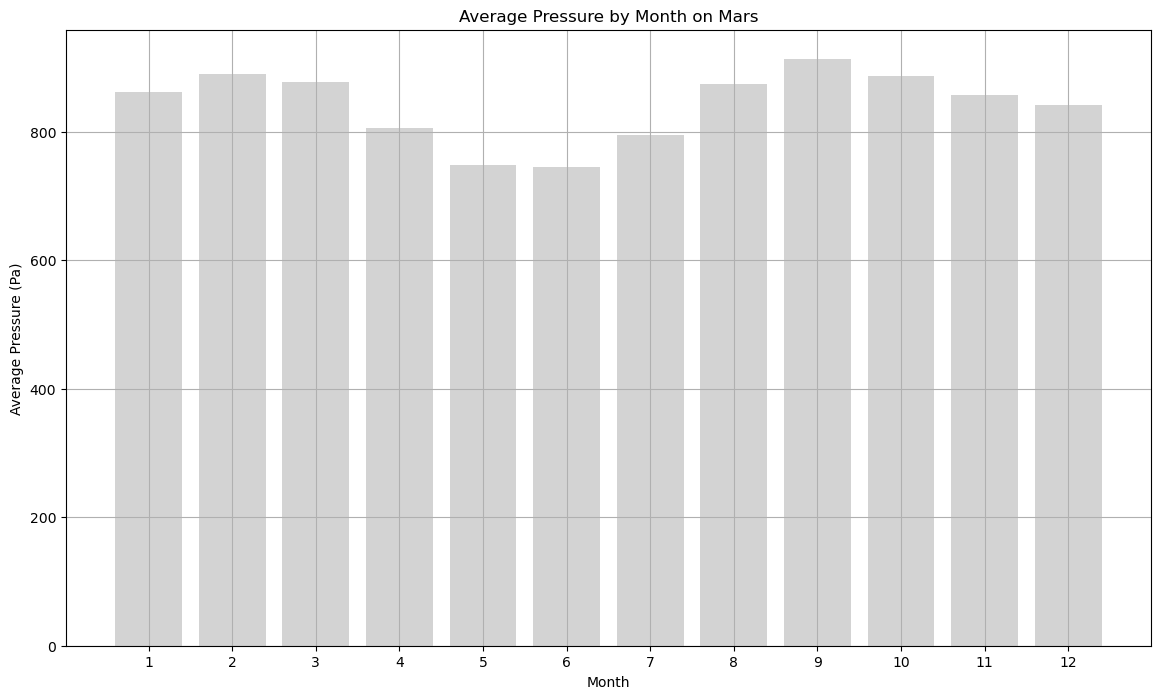

In [19]:
# Plot the average pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the average pressure by month as a bar graph with x-axis on the top
plt.figure(figsize=(14,8))
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values, color='lightgrey')
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.grid(True)
plt.xticks(ticks=avg_pressure_by_month.index, labels=avg_pressure_by_month.index)
plt.show()

9th month is the highest pressure month on mars with a pressure of 913.3059701492538 (Pa)
6th month is the lowest pressure month on mars with a pressure of 745.0544217687075 (Pa)
On an average Mars has 841.0664167113016 (Pa) pressure


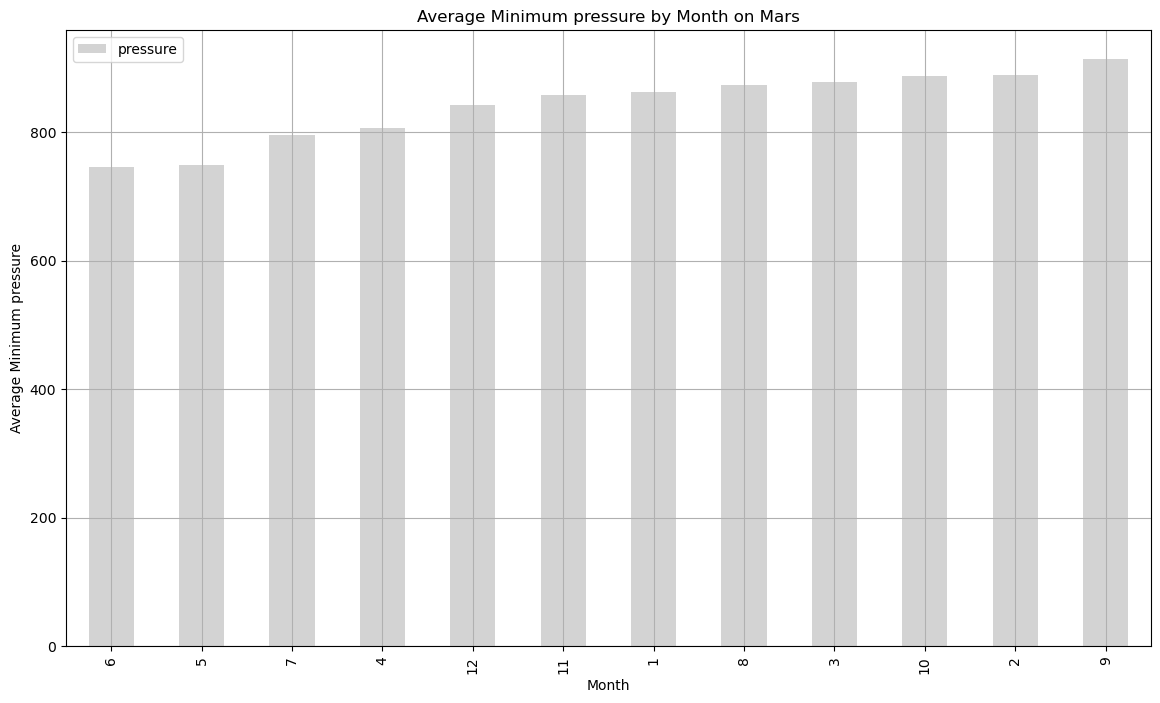

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the average minimum pressure by month and convert to DataFrame
avg_pressure_by_month_sorted = pd.DataFrame(avg_pressure_by_month.sort_values())
avg_pressure_mars = df['pressure'].sum()/df['pressure'].__len__()

# Get the highest pressure and hottest months along with their index values
highest_pressure_value = avg_pressure_by_month_sorted.iloc[-1]['pressure']
highest_pressure_index = avg_pressure_by_month_sorted.index[-1]
lowest_pressure_value = avg_pressure_by_month_sorted.iloc[0]['pressure']
lowest_pressure_index = avg_pressure_by_month_sorted.index[0]

print(f"{highest_pressure_index}th month is the highest pressure month on mars with a pressure of {highest_pressure_value} (Pa)")
print(f"{lowest_pressure_index}th month is the lowest pressure month on mars with a pressure of {lowest_pressure_value} (Pa)")
print(f'On an average Mars has {avg_pressure_mars} (Pa) pressure')

# Plot the sorted average minimum pressure by month as a bar graph with x-axis on the top
avg_pressure_by_month_sorted.plot(kind='bar', y='pressure', color='lightgrey', figsize=(14,8))
plt.title('Average Minimum pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum pressure')
plt.grid(True)
plt.show()

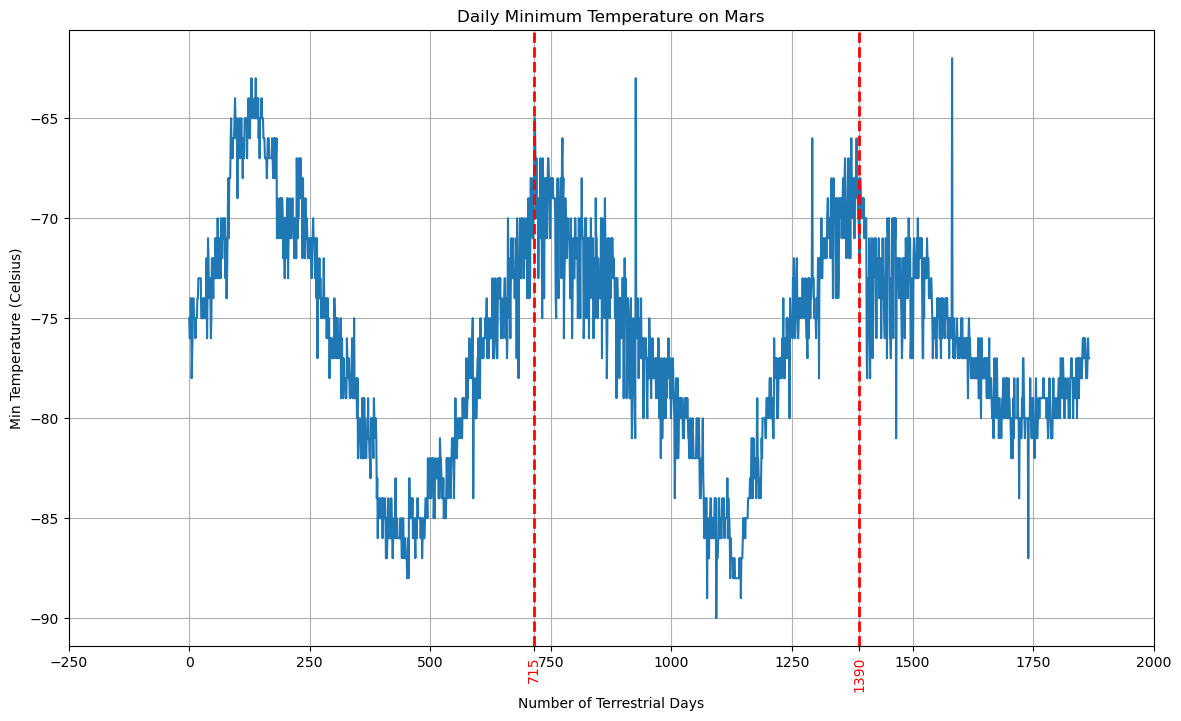

In [26]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

num_days = range(len(df))
plt.figure(figsize=(14,8))
plt.grid()
plt.plot(num_days, df['min_temp'])
plt.axvline(x=715, color='red', linestyle='--', linewidth=2)
plt.axvline(x=1390, color='red', linestyle='--', linewidth=2)
plt.xticks(list(plt.xticks()[0]) + [715, 1390])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Min Temperature (Celsius)')
plt.title('Daily Minimum Temperature on Mars')

# Set the color for specific x-ticks
for tick in plt.gca().get_xticklabels():
    if tick.get_text() in ['715', '1390']:
        tick.set_color('red')
        tick.set_rotation(90)
        
plt.show()

#### Minimum Temperature

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. On an average Mars has -76.12104981253347 °C temperature. The temperature is always negative and beyond Human Sustainability!
- 3rd month is the coldest month on mars with a temperature of -83.30729166666667°C
- 8th month is the hottest month on mars with a temperature of -68.38297872340425°C

#### Atmospheric Pressure

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth. On an average Mars has 841.0664167113016 (Pa) pressure, indicating a thinner atmosphere layer on mars.
- 9th month is the highest pressure month on mars with a pressure of 913.3059701492538 (Pa)
- 6th month is the lowest pressure month on mars with a pressure of 745.0544217687075 (Pa)

#### Year Length

The distance from peak to peak is roughly 1390-715, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
df.to_csv('mars_df.csv', index=False)

In [23]:
browser.quit()